In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB

Data Cleaning

In [2]:
df=pd.read_csv("framingham.csv")

In [3]:
print('Shape of data',df.shape)

Shape of data (4238, 16)


In [4]:
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df.tail(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [6]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [8]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [10]:
columns_with_na = ['education','cigsPerDay','BPMeds','totChol','BMI','heartRate','glucose']

for i in columns_with_na: 
    df[i].fillna(df[i].mean(),inplace=True)

In [11]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [12]:
df.nunique()

male                  2
age                  39
education             5
currentSmoker         2
cigsPerDay           34
BPMeds                3
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             249
sysBP               234
diaBP               146
BMI                1364
heartRate            74
glucose             144
TenYearCHD            2
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


Data Visualization

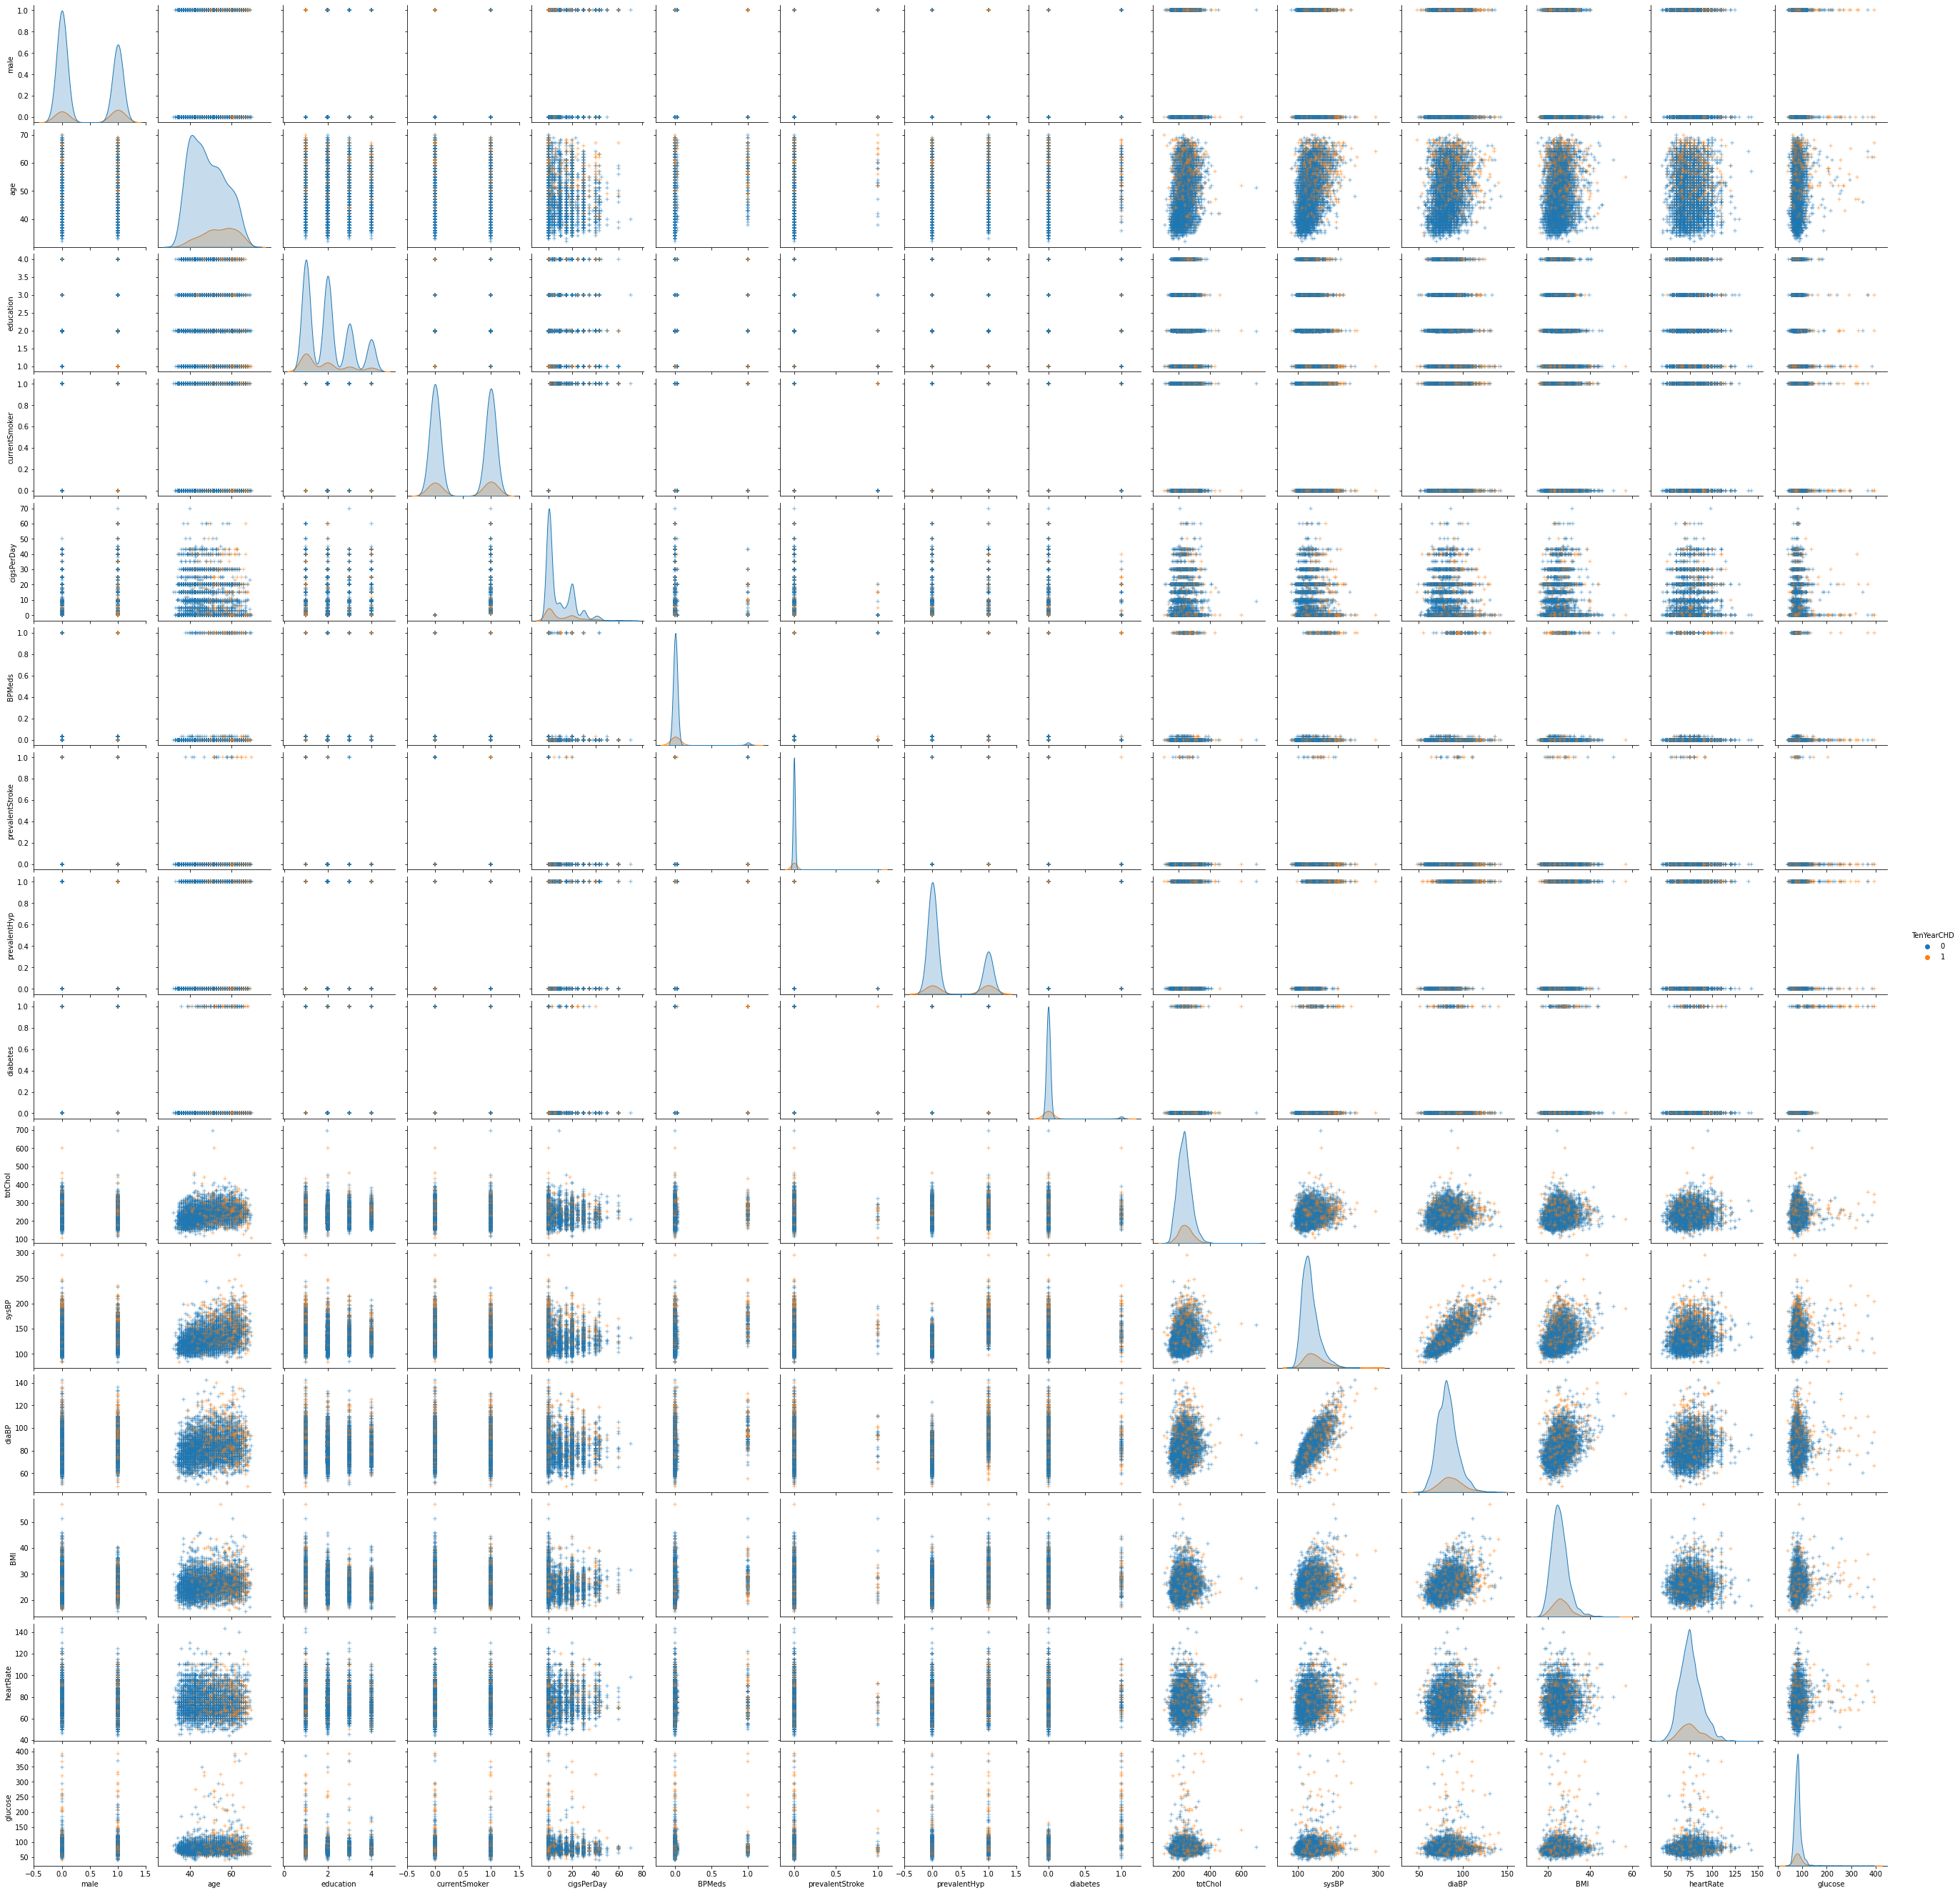

In [41]:
graphs = sns.pairplot(df, hue= 'TenYearCHD', markers='+')
plt.show()

male               0.088428
age                0.225256
education         -0.053384
currentSmoker      0.019456
cigsPerDay         0.057775
BPMeds             0.086774
prevalentStroke    0.061810
prevalentHyp       0.177603
diabetes           0.097317
totChol            0.081624
sysBP              0.216429
diaBP              0.145299
BMI                0.074680
heartRate          0.022898
glucose            0.120406
TenYearCHD         1.000000
Name: TenYearCHD, dtype: float64


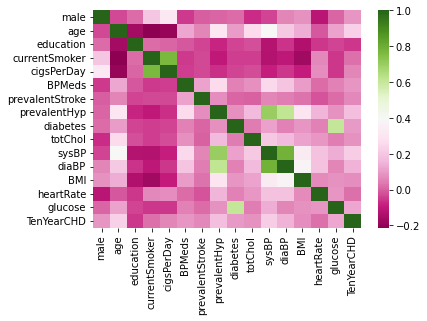

In [15]:
corr = df.corr()
sns.heatmap(corr, cmap='PiYG')
corr.sort_values(["TenYearCHD"], ascending = False)
print(corr.TenYearCHD)

In [16]:
#removing 'education' since there's a negative correlation score and the ten year risk
df.drop(columns = ['education', 'TenYearCHD'], axis=1)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.00000,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000
1,0,46,0,0.0,0.00000,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000
2,1,48,1,20.0,0.00000,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000
3,0,61,1,30.0,0.00000,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000
4,0,46,1,23.0,0.00000,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.00000,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000
4234,1,51,1,43.0,0.00000,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000
4235,0,48,1,20.0,0.02963,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000
4236,0,44,1,15.0,0.00000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753


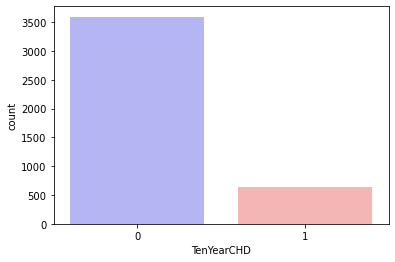

In [17]:
sns.countplot(x="TenYearCHD", data=df, palette="bwr")
plt.show()

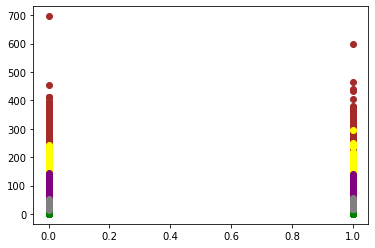

In [18]:
plt.scatter(df['TenYearCHD'], df['age'], color='red'), 
plt.scatter(df['TenYearCHD'],df['BPMeds'],color='blue')
plt.scatter(df['TenYearCHD'],df['prevalentStroke'],color='black')
plt.scatter(df['TenYearCHD'],df['prevalentHyp'],color='orange')
plt.scatter(df['TenYearCHD'],df['diabetes'],color='green')
plt.scatter(df['TenYearCHD'],df['totChol'],color='brown')
plt.scatter(df['TenYearCHD'],df['sysBP'],color='yellow')
plt.scatter(df['TenYearCHD'],df['diaBP'],color='purple')
plt.scatter(df['TenYearCHD'],df['BMI'],color='grey')

Getting input ready

In [19]:
x = df.drop(columns = ['education', 'TenYearCHD'], axis=1)
y = df['TenYearCHD']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)

In [20]:
stanscal = StandardScaler()
stanscal.fit(x_train)
x_train = stanscal.transform(x_train)
x_test = stanscal.transform(x_test)

In [21]:
user_inp = []
user_inp.append(input("gender (1 for male, 0 for female) "))
user_inp.append(input("age"))
user_inp.append(input("currentSmoker"))
user_inp.append(input("cigsPerDay"))
user_inp.append(input("BPMeds"))
user_inp.append(input("prevalentStroke"))
user_inp.append(input("prevalentHyp"))
user_inp.append(input("diabetes"))
user_inp.append(input("totChol"))
user_inp.append(input("sysBP"))
user_inp.append(input("diaBP"))
user_inp.append(input("BMI"))
user_inp.append(input("heartRate"))
user_inp.append(input("glucose"))

gender (1 for male, 0 for female) 0
age39
currentSmoker0
cigsPerDay0
BPMeds0
prevalentStroke0
prevalentHyp0
diabetes0
totChol190
sysBP107
diaBP90
BMI27
heartRate80
glucose77


In [22]:
user_inp_np = np.asarray(user_inp)
user_inp_re = user_inp_np.reshape(1, -1)
user_input = stanscal.transform(user_inp_re)

C:\Users\Windows\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
user_input = np.array(user_inp).reshape(1, -1)

Linear Regression

In [24]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
accuracy1 = log_reg.score(x_test, y_test)
accuracy1

0.8411949685534591

In [25]:
prediction1 = log_reg.predict(user_input)

C:\Users\Windows\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


SVM 

In [26]:
svm = svm.SVC(kernel = 'linear')
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [27]:
x_test_pred = svm.predict(x_test)
accuracy2 = accuracy_score(y_test, x_test_pred)
accuracy2

0.8364779874213837

In [28]:
prediction2 = svm.predict(user_input)

Random Forest

In [29]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [30]:
x_test_pred = clf.predict(x_test)
accuracy3 = accuracy_score(y_test, x_test_pred)
accuracy3

0.8333333333333334

In [31]:
prediction3 = clf.predict(user_input)

Naive Bayes

In [32]:
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [33]:
Y_pred_nb = nb.predict(x_test)

In [34]:
accuracy4 = round(accuracy_score(Y_pred_nb,y_test)*100,2)
accuracy4

82.23

In [35]:
prediction4 = nb.predict(user_input)

C:\Users\Windows\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


Conclusions

In [36]:
pred = [prediction1, prediction2, prediction3, prediction4]
pred

[array([1], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64)]

In [37]:
weighted_mean = ((prediction1)+(prediction2)+(prediction3)+(prediction4))/4
weighted_mean

array([0.75])

In [38]:
#probability of heart disease
probability = 100*weighted_mean
print(f"chances of heart disease: {probability} %")

chances of heart disease: [75.] %
